# What is NumPy (Numeric Python) ?

# Why NumPy ?

SciPy (Scientific Python) is often mentioned in the same breath with NumPy. SciPy needs Numpy, as it is based on the data structures of Numpy and furthermore its basic creation and manipulation functions. It extends the capabilities of NumPy with further useful functions for minimization, regression, Fourier-transformation and many others.
Both NumPy and SciPy are not part of a basic Python installation. They have to be installed after the Python installation. NumPy has to be installed before installing SciPy.
NumPy is based on two earlier Python modules dealing with arrays. One of these is Numeric. Numeric is like NumPy a Python module for high-performance, numeric computing, but it is obsolete nowadays. Another predecessor of NumPy is Numarray, which is a complete rewrite of Numeric but is deprecated as well. NumPy is a merger of those two, i.e. it is build on the code of Numeric and the features of Numarray.

# "It's hardware that makes a machine fast. It's software that makes a fast machine slow."

In [1]:
import numpy as np

In [2]:
cvalues = [20.1, 20.8, 21.9, 22.5, 22.7, 22.3, 21.8, 21.2, 20.9, 20.1]

In [4]:
C = np.array(cvalues)
print(C)

[20.1 20.8 21.9 22.5 22.7 22.3 21.8 21.2 20.9 20.1]


# Let's assume, we want to turn the values into degrees Fahrenheit. This is very easy to accomplish with a numpy array. The solution to our problem can be achieved by simple scalar multiplication:

In [5]:
print(C * 9 / 5 + 32)

[68.18 69.44 71.42 72.5  72.86 72.14 71.24 70.16 69.62 68.18]


In [6]:
print(C)


[20.1 20.8 21.9 22.5 22.7 22.3 21.8 21.2 20.9 20.1]


In [10]:
fvalues = [ x*9/5 + 32 for x in cvalues] 
print(fvalues)

[68.18, 69.44, 71.42, 72.5, 72.86, 72.14, 71.24000000000001, 70.16, 69.62, 68.18]


In [7]:
type(C)

numpy.ndarray

# Basic Datavisualization

In [12]:
%matplotlib inline


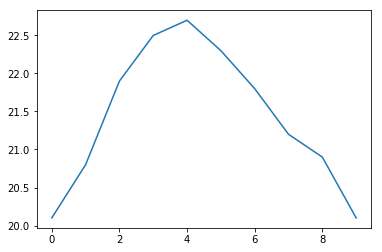

In [13]:
import matplotlib.pyplot as plt
plt.plot(C)
plt.show()

# Memory calculation of ndarray and list

In [15]:
from sys import getsizeof as size
lst = [24, 12, 57]
size_of_list_object = size(lst)   
size_of_elements = len(lst) * size(lst[0])
total_list_size = size_of_list_object + size_of_elements
print("Size without the size of the elements: ", size_of_list_object)
print("Size of all the elements: ", size_of_elements)
print("Total size of list, including elements: ", total_list_size)

Size without the size of the elements:  88
Size of all the elements:  84
Total size of list, including elements:  172


In [16]:
lst = [24, 12, 57, 42]
size_of_list_object = size(lst)   
size_of_elements = len(lst) * size(lst[0]) 
total_list_size = size_of_list_object + size_of_elements
print("Size without the size of the elements: ", size_of_list_object)
print("Size of all the elements: ", size_of_elements)
print("Total size of list, including elements: ", total_list_size)
 
lst = []
print("Emtpy list size: ", size(lst))

Size without the size of the elements:  96
Size of all the elements:  112
Total size of list, including elements:  208
Emtpy list size:  64


We can say from this that for every new element, we need another eight bytes for the reference to the new object. The new integer object itself consumes 28 bytes. The size of a list "lst" without the size of the elements can be calculated with:

64 + 8 * len(lst)

# Memory Calculation of numpy array

In [19]:
a = np.array([24, 12, 57])
print(size(a))

120


In [20]:
e = np.array([])
print(size(e))

96


We can see that the difference between the empty array "e" and the array "a" with three integers consists in 24 Bytes. This means that an arbitrary integer array of length "n" in numpy needs

96 + n * 8 Bytes

whereas a list of integers needs, as we have seen before

64 + 8 len(lst) + len(lst) 28

In [21]:
a = np.array([24, 12, 57], np.int8)
print(size(a) - 96)
a = np.array([24, 12, 57], np.int16)
print(size(a) - 96)
a = np.array([24, 12, 57], np.int32)
print(size(a) - 96)
a = np.array([24, 12, 57], np.int64)
print(size(a) - 96)

3
6
12
24


In [22]:
# Time Calculation between python List and NumPy

In [23]:
import time
size_of_vec = 1000
def pure_python_version():
    t1 = time.time()
    X = range(size_of_vec)
    Y = range(size_of_vec)
    Z = [X[i] + Y[i] for i in range(len(X)) ]
    return time.time() - t1
def numpy_version():
    t1 = time.time()
    X = np.arange(size_of_vec)
    Y = np.arange(size_of_vec)
    Z = X + Y
    return time.time() - t1

In [24]:
t1 = pure_python_version()
t2 = numpy_version()
print(t1, t2)
print("Numpy is in this example " + str(t1/t2) + " faster!")

0.00026798248291015625 2.9802322387695312e-05
Numpy is in this example 8.992 faster!


In [28]:
import numpy as np
from timeit import Timer
size_of_vec = 1000
X_list = range(size_of_vec)
Y_list = range(size_of_vec)
X = np.arange(size_of_vec)
Y = np.arange(size_of_vec)
def pure_python_version():
    Z = [X_list[i] + Y_list[i] for i in range(len(X_list)) ]
def numpy_version():
    Z = X + Y
#timer_obj = Timer("x = x + 1", "x = 0")
timer_obj1 = Timer("pure_python_version()", 
                   "from __main__ import pure_python_version")
timer_obj2 = Timer("numpy_version()", 
                   "from __main__ import numpy_version")
print(timer_obj1.timeit(10))
print(timer_obj2.timeit(10))

0.0030351089999385295
0.00031867600000623497


In [26]:
print(timer_obj1.repeat(repeat=3, number=10))
print(timer_obj2.repeat(repeat=3, number=10))

[0.002985523999996076, 0.0031529800003227137, 0.0029028269996160816]
[3.405500001463224e-05, 1.1654999980237335e-05, 0.0002807079999911366]
